# HW7 - Modeling Pandemics
Submit as *firstname_lastname-HW7.ipynb*

### Question 1
Immunological memory does indeed degrade over time. Recall from the lectures that we can model imperfect immunity using the following two equations

$$\dot{I} = \alpha I S - \frac{I}{\tau_{inf}}$$
$$\dot{S} = -\alpha I S + \frac{N - I - S}{\tau_{imm}}$$

The S-nullcline is a set of points in the phase plane where $\dot{S} = 0$. Geometrically speaking, these are the
points where the vectors point directly towards or away from the S-axis (horizontal in our example). Algebraically, we find the S-nullcline by solving $\dot{S} = 0$. 

Find the I and S nullclines. Define a python function for them and plot them on top of a quiver plot representing phase space. 
Use $\alpha = 0.4$, $\tau_{inf} = 0.1$, $\tau_{imm} = 3$. Plot phase space from 0 to 100 for $\dot{S}$ and $\dot{I}$ axes. 


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


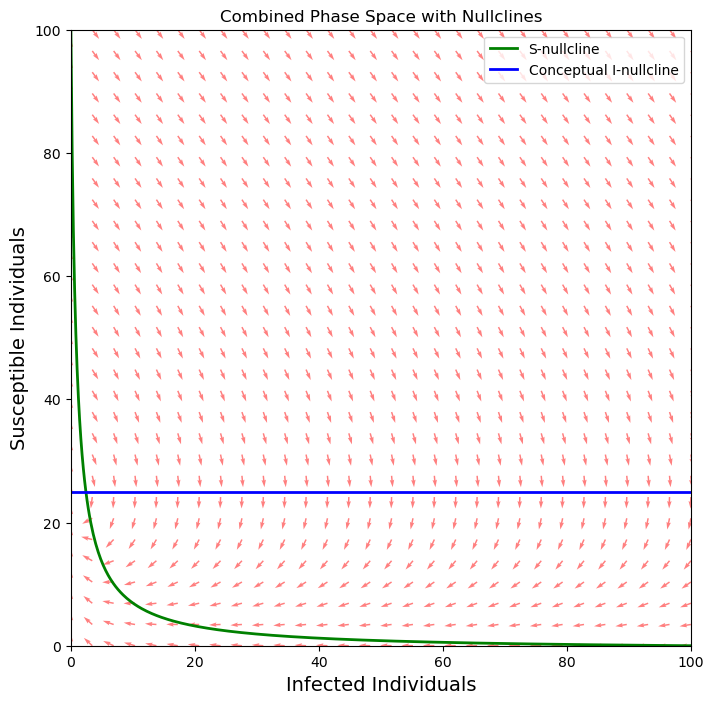

In [16]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%pylab inline
pylab.rcParams['figure.figsize'] = (8,8)

#Create a function for imperfect immunity incorporating the respective differential equations
def imperfectImmunity(state, t):
    I = state[0]
    S = state[1]
    
    #define system
    dI_dt = a*I*S - I/tau
    R = N - S - I 
    dS_dt = -a*I*S + R/tau2 
    
    return(dI_dt, dS_dt)

# Create the parameters of the system
a = 0.4
tau = 0.1
tau2 = 3
Ilim = [0,100]
Slim = [0,100]
npoints = 30

# Create linspaces 
h1 = np.linspace(Ilim[0],Ilim[1], npoints)
h2 = np.linspace(Slim[0],Slim[1], npoints)

# Create mesh grid
H1, H2 = np.meshgrid(h1,h2)

# Create evecs
u,v = np.zeros(H1.shape), np.zeros(H2.shape)

# Create dimensions of mesh grid
NJ, NK = H1.shape

# Create vectors for the phase plot
for j in range(NJ):
    for k in range(NK):
        Istate = H1[j,k]
        Sstate = H2[j,k]
        
        statejk = [Istate, Sstate]
        
        ISdot = imperfectImmunity(statejk,[])
        
        u[j,k] = ISdot[0]
        v[j,k] = ISdot[1]

# Normalize vectors so they are all of the same magnitude
M = (np.hypot(u,v))
M[M == 0] = 1.
u /= M
v /= M

N = 100  # Total population

# Calculate Snullcline for a range of I values
I_values = np.linspace(0, N, 500)  # Creating a range of I values to plot S-nullcline
Snullcline_values = []

for I in I_values:
    # Create equation for Snullcline that solves for S in the context of S_dot = 0
    R = N - I  # Approximation assuming S is the primary variable changing with I
    S = fsolve(lambda S: -a * I * S + (R - S) / tau2, N / 2)[0]  # Solving for S when S_dot = 0
    Snullcline_values.append(S)

# Calculate I_nullcline

Inullcline_value = 1 / (tau * a)  
plt.figure(figsize=(8, 8))

# Create quiver plot representing the phase space
plt.quiver(H1, H2, u, v, color='r', alpha=0.5)

# Plot S-nullcline
plt.plot(I_values, Snullcline_values, 'g-', linewidth=2, label='S-nullcline')

# Plotting the conceptual I-nullcline
plt.axhline(y=25, color='blue', linestyle='-', linewidth=2, label='Conceptual I-nullcline')  # Example value for visualization
plt.xlabel('Infected Individuals', fontsize=14)
plt.ylabel('Susceptible Individuals', fontsize=14)
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Combined Phase Space with Nullclines')
plt.show()

## Question 2.1 - Seasonal Variation

There are many extensions of this model to capture important relevant dynamics.
One important class deals with the seasonal variation in the transmission rate parameter $\alpha$. For example, in the 1918 spanish flu there was a decrease in susceptibility in the summer followed by an increase in susceptibility in the fall which created large spikes in infected individuals. This could also represent scientifically ignorant politicians making, what they think are politically expedient decisions, by bringing people back to work too early. 

These variations can be modeled by placing the fixed parameter $\alpha$ with a *forcing function* $\alpha(t)$.
Let's compare these variations and see how time-varying $\alpha(t)$ effects the dynamics of $I$. 

* Plot the I, S, and R as a function of t over `t = np.linspace(0,10,1000)` using the following parameters:


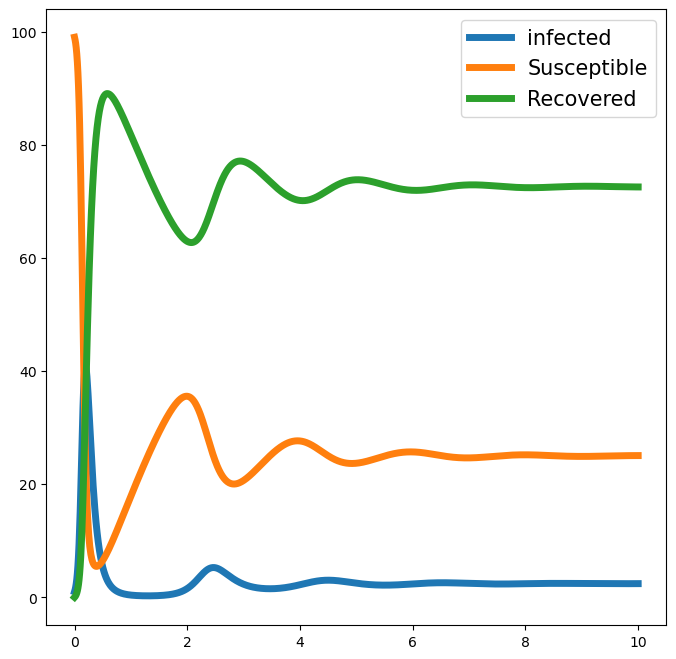

In [13]:
#Set the parameters
a = .4
tau = .1
tau2 = 3
state0 = [1,99]
N = np.sum(state0)


def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return(Nvec - St - It)

#Appropriate timescale for seeing how I changes overtime
state = odeint(imperfectImmunity,state0, t)
t = np.linspace(0,10,1000)

#Plot the differential dynamics of infected, susceptible and recovered individuals
plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N,state[:,0], state[:,1]), linewidth = 5)
plt.legend(('infected','Susceptible','Recovered'),fontsize = 15)

## Question 2.2 - Seasonal Variation
To implement $\alpha(t)$ make a new function bearing the differential equations but this time with $\alpha = $ `a*(sin(t)+1)`. Make sure you replace all instances of $\alpha$.

* Plot it with the exact same parameters as above. Describe what happens in a markdown cell below. Although you can't plot the phase portrait using a static graph, imagine that it is shifting with shifting $\alpha$. What is the I-nullcline doing?


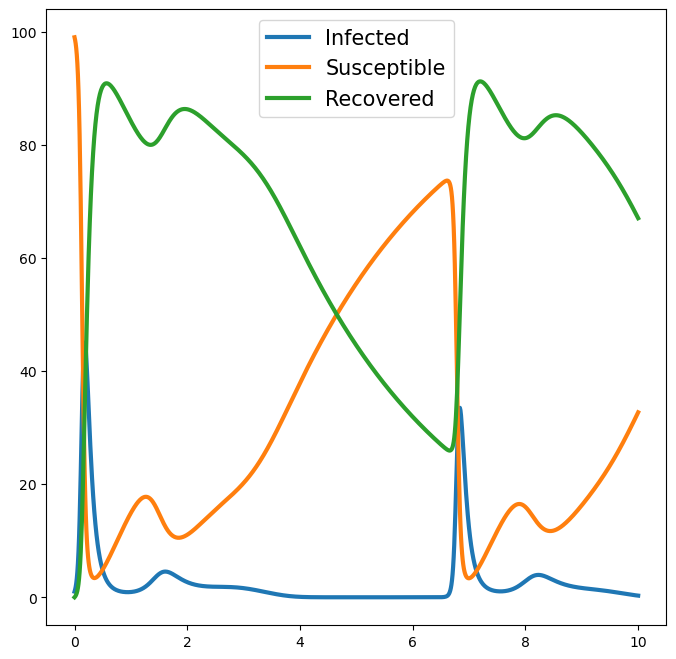

In [14]:
#Define function for sinusoidal dynamics in the system
def alpha(t): 
    return a*(np.sin(t)+1) 

#Incorporate alpha into differential equations to express seasonal variation
def SeasonalVariation(state, t): 
    I = state[0]
    S = state[1]
    
    dIdt = alpha(t)*I*S - I/tau 
    R = N - S - I 
    dSdt = -alpha(t)*I*S + R/tau2 
    
    return(dIdt, dSdt)

#Set of parameters for the systems
a = .4
tau = .1
tau2 = 3
state0 = [1,99]
N = np.sum(state0)
t = np.linspace(0,10,1000)

state = odeint(SeasonalVariation,state0, t)

#Plot seasonal variation expressed by alpha and seasonal variation function
plt.plot(t, state, linewidth = 3)
plt.plot(t, Rt(N,state[:,0], state[:,1]), linewidth = 3)
plt.legend(('Infected','Susceptible','Recovered'),fontsize = 15)

* What is happening to I-nullcline? I-nullcline is dynamical and oscillates with a(t)
* The shifting of I-nullcline insinuates that the equilibrium points where Idot and Sdot = 0 shift overtime as well. This can be seen in the plot and describes the dynamic disease spread

## Question 2.3 - The Effect of Frequency
If the period of $\alpha(t)$'s oscillations is fast relative to the timescale of the SIR dynamics then there are small outbreaks and $S$ remains close to $N$. If the period is slower then $I$ can get higher. 

Examine this by doing the following:

* Build a for loop and run the simulation over a range of sinusoidal frequencies from `freqs = pi*np.array([.25,.5,1,2,4])`

* Sum the total number of Infected individuals and plot them as a function of frequency. What is the frequency that gives the greates integrated number of infections?


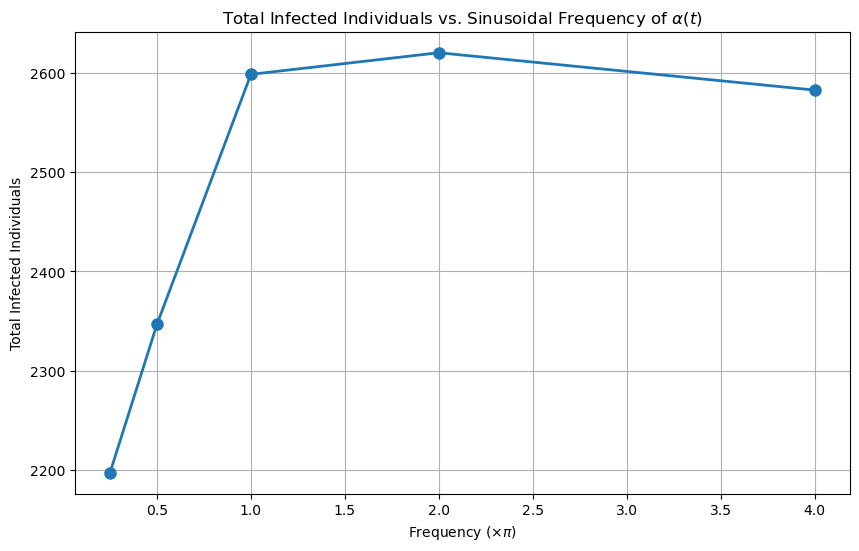

In [15]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters as well as intial conditions for the system
a = 0.4
tau = 0.1
tau2 = 3
N = np.sum(state0)  
state0 = [1, 99]
t = np.linspace(0, 50, 1000)  

# Create frequency variable to see sinusoidal dynamics
freqs = np.pi * np.array([0.25, 0.5, 1, 2, 4])

# Create a function that incorporates both alpha(t) and freq into the differential equations to model the system
def SeasonalVariationFreq(state, t, freq):
    I, S = state
    alpha_t = a * (np.sin(freq * t) + 1)
    dIdt = alpha_t * I * S - I / tau
    R = N - S - I  # Recovered individuals
    dSdt = -alpha_t * I * S + R / tau2
    return dIdt, dSdt

# Create an array to store the number of infected individuals
total_infected = []

# Create a for loop that runs the simulation for each frequency and sums the total infected individuals
for freq in freqs:
   
    state = odeint(SeasonalVariationFreq, state0, t, args=(freq,))
    total_infected.append(np.sum(state[:, 0]))

# Plot the sinusoidal frequency of the system against the total number of infected individuals
plt.figure(figsize=(10, 6))
plt.plot(freqs / np.pi, total_infected, '-o', markersize=8, linewidth=2)
plt.xlabel('Frequency ($\\times \\pi$)')
plt.ylabel('Total Infected Individuals')
plt.title('Total Infected Individuals vs. Sinusoidal Frequency of $\\alpha(t)$')
plt.grid(True)
plt.show()

* A frequency of 2 gives the greatest integrated number of infections

## Question 2.4 - Extra Credit
Investigate non-sinusoidal oscillations. Which waveforms engender the worst epidemics?

## Question 3 - Latency

In many diseases, some amount of time passes between being infected and being able to pass the virus to others. This period is called a *latent period*. To capture this we can add a third state variable to our imperfect immunity model described in Question 1, lets call it $X$, which keeps track of exposed individuals. 

* Create a function with expressing these differential equations, where there is a third timescale parameter, $\tau_{lat}$
* Simulate and plot the 3 quantities as a function of time starting with 1 infected individual, 99 susceptible, and 0 exposed. 
* The non-trivial equilibrium point $(I, X, S) = (0, 0, N)$ is unstable. What are the coordinates of the *endemic equilibrium point*? (Show you work as an attached photo if necessary).



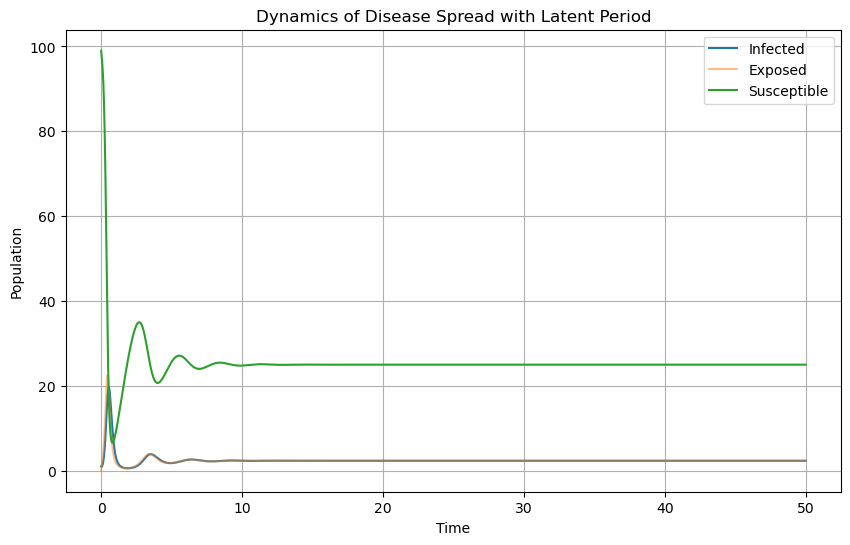

In [22]:
# Create the parameters for the system
a = 0.4  
tau_lat = 0.1  
tau_inf = 0.1  
tau_imm = 3  
N = 100  
t = np.linspace(0, 50, 1000)

# Create initial conditions
state0 = [1, 0, 99]  


# Create a modified imperfect immunity function including the latency variable
def imperfect_immunity_latency(state, t, a, tau_lat, tau_inf, tau_imm, N):
    I, X, S = state
    dSdt = -a * S * I + (N - S - I - X) / tau_imm
    dXdt = a * S * I - X / tau_lat
    dIdt = X / tau_lat - I / tau_inf
    return [dIdt, dXdt, dSdt]

# Simulate the model
state = odeint(imperfect_immunity_latency, state0, t, args=(a, tau_lat, tau_inf, tau_imm, N))

# Create a plot for the model including latency
plt.figure(figsize=(10, 6))
plt.plot(t, state[:, 0], label='Infected')
plt.plot(t, state[:, 1], label='Exposed', alpha = 0.5)
plt.plot(t, state[:, 2], label='Susceptible')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dynamics of Disease Spread with Latent Period')
plt.legend()
plt.grid(True)
plt.show()

## Solving for endemic equilibrium points
* To find the endemic equilibrium points you must set the derivatives equal to 0 and solve for I, X, and S

In [26]:
from sympy import symbols, Eq, solve

# Define equations based on the equilibrium conditions
eq1 = Eq(-alpha * S * I + (N - S - I - X) / tau_imm, 0)
eq2 = Eq(alpha * S * I - X / tau_lat, 0)
eq3 = Eq(X / tau_lat - I / tau_inf, 0)

# Solve the system of equations 
solution = solve((eq1, eq2, eq3), (I, X, S), dict=True)

# Evaluate the solutions 
endemic_equilibrium_evaluated = []
for sol in solution:
    evaluated_sol = {var: sol[var].evalf(subs=param_values) for var in (I, X, S)}
    endemic_equilibrium_evaluated.append(evaluated_sol)

endemic_equilibrium_evaluated


[{I: 0, X: 0, S: 100.000000000000},
 {I: 2.34375000000000, X: 2.34375000000000, S: 25.0000000000000}]

## Question 3 - Extra Credit
* The phase space is now in 3D and the nullclines are now planes through that space. 
* Solve for the nullclines. Plot them and plot a cube of vectors representing phase space. 

## Question 4 - Thinking about your final assignment.

For the final assignment I would like you to find a mathematical model representing any aspect of a biological system, attempt to reproduce it in python and the results, and use it to ask a new scientifically relevant question. You (and your team) will submit a single python notebook as well as a written report of your findings. If the paper has already used python then it will not be allowed. 

* Please tell me who you plan to work with and submit the titles and links to 3 scientific papers that you are interested in exploring for this assignment. 

## I plan to work with:
* Olga Barbashova
* Peter Gadala
* Julia Teymouri

### The papers we are looking at are:
* https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1004665&type=printable
* https://www.mdpi.com/1999-4915/7/10/2875
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4769590/pdf/12976_2016_Article_32.pdf